# PCA and Heatmaps

## PCA

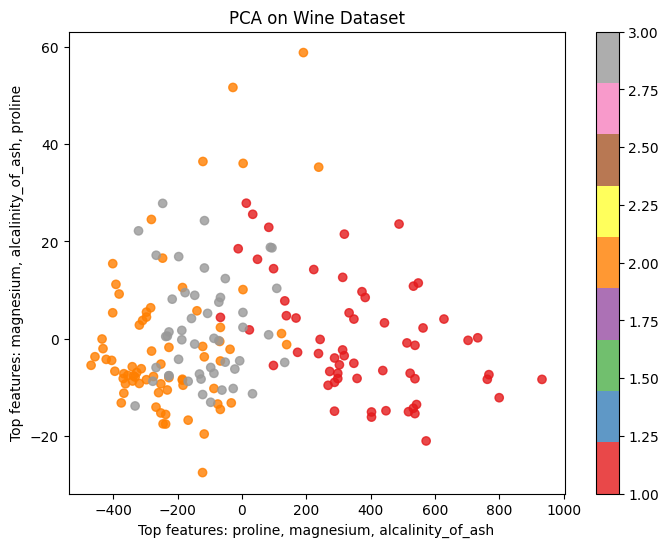

PCA Loadings (Feature Contributions to PC1 and PC2):
                           PC1       PC2
alcohol               0.001659  0.001203
malic_acid           -0.000681  0.002155
ash                   0.000195  0.004594
alcalinity_of_ash    -0.004671  0.026450
magnesium             0.017868  0.999344
total_phenols         0.000990  0.000878
flavanoids            0.001567 -0.000052
nonflavanoid_phenols -0.000123 -0.001354
proanthocyanins       0.000601  0.005004
color_intensity       0.002327  0.015100
hue                   0.000171 -0.000763
OD280/OD315           0.000705 -0.003495
proline               0.999823 -0.017774


In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                'color_intensity', 'hue', 'OD280/OD315', 'proline']
wine_data = pd.read_csv(url, names=column_names)

# Separate features and labels
wine_features = wine_data.drop(columns=['class'])
wine_labels = wine_data['class']

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_features)

# Get the PCA loadings (coefficients)
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=wine_features.columns)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_labels, cmap='Set1', alpha=0.8)
plt.title('PCA on Wine Dataset')

# Show the top contributing features in each principal component in the labels
top_features_pc1 = pca_loadings['PC1'].abs().nlargest(3).index  # Top 3 features in PC1
top_features_pc2 = pca_loadings['PC2'].abs().nlargest(3).index  # Top 3 features in PC2

plt.xlabel(f'{", ".join(top_features_pc1)}')
plt.ylabel(f'{", ".join(top_features_pc2)}')

plt.colorbar()
plt.show()

# Show the loadings (how much each feature contributes to each principal component)
print("PCA Loadings (Feature Contributions to PC1 and PC2):")
print(pca_loadings)

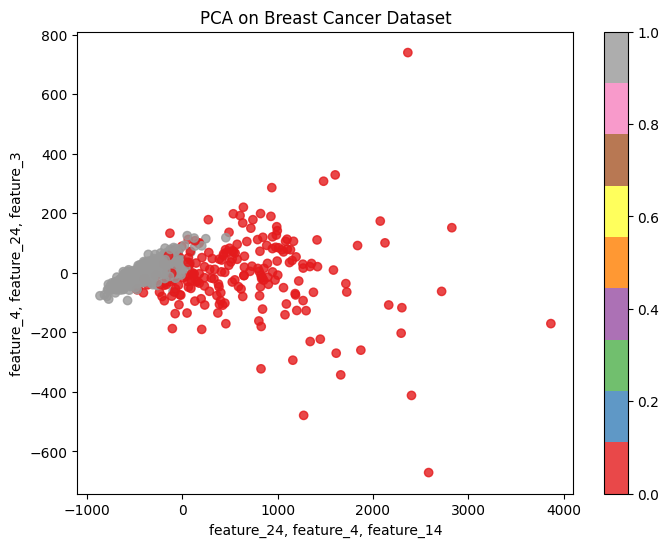

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis'] + ['feature_' + str(i) for i in range(1, 31)]
breast_cancer_data = pd.read_csv(url, names=column_names)

# Drop 'id' column and separate features and labels
breast_cancer_features = breast_cancer_data.drop(columns=['id', 'diagnosis'])
breast_cancer_labels = breast_cancer_data['diagnosis'].map({'M': 0, 'B': 1})  # Map 'M' (Malignant) to 0 and 'B' (Benign) to 1

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(breast_cancer_features)

# Get the PCA loadings (coefficients)
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=breast_cancer_features.columns)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=breast_cancer_labels, cmap='Set1', alpha=0.8)
plt.title('PCA on Breast Cancer Dataset')

# Show the top contributing features in each principal component in the labels
top_features_pc1 = pca_loadings['PC1'].abs().nlargest(3).index  # Top 3 features in PC1
top_features_pc2 = pca_loadings['PC2'].abs().nlargest(3).index  # Top 3 features in PC2

plt.xlabel(f'{", ".join(top_features_pc1)}')
plt.ylabel(f'{", ".join(top_features_pc2)}')


plt.colorbar()
plt.show()

/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_81790/2702583797.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_81790/2702583797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

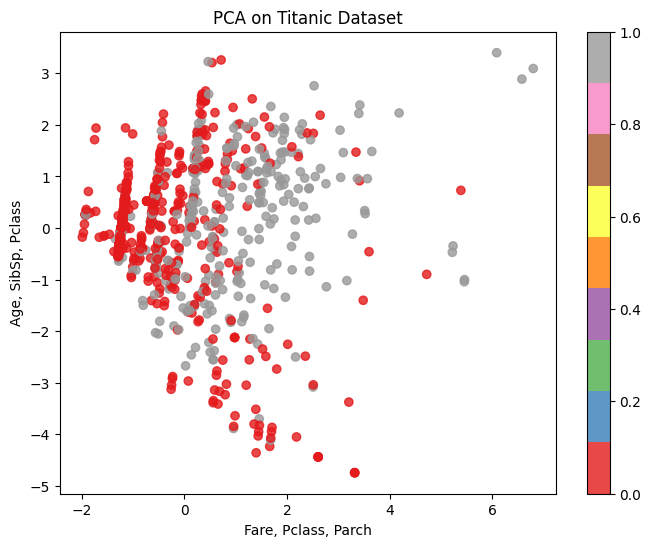

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Preprocessing: Fill missing values and encode categorical features
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna('S', inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
titanic_features = titanic_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Survived'])

# Scale the features
scaler = StandardScaler()
scaled_titanic_features = scaler.fit_transform(titanic_features)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_titanic_features)


# Get the PCA loadings (coefficients)
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=titanic_features.columns)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=titanic_data['Survived'], cmap='Set1', alpha=0.8)
plt.title('PCA on Titanic Dataset')


# Show the top contributing features in each principal component in the labels
top_features_pc1 = pca_loadings['PC1'].abs().nlargest(3).index  # Top 3 features in PC1
top_features_pc2 = pca_loadings['PC2'].abs().nlargest(3).index  # Top 3 features in PC2

plt.xlabel(f'{", ".join(top_features_pc1)}')
plt.ylabel(f'{", ".join(top_features_pc2)}')


plt.colorbar()
plt.show()

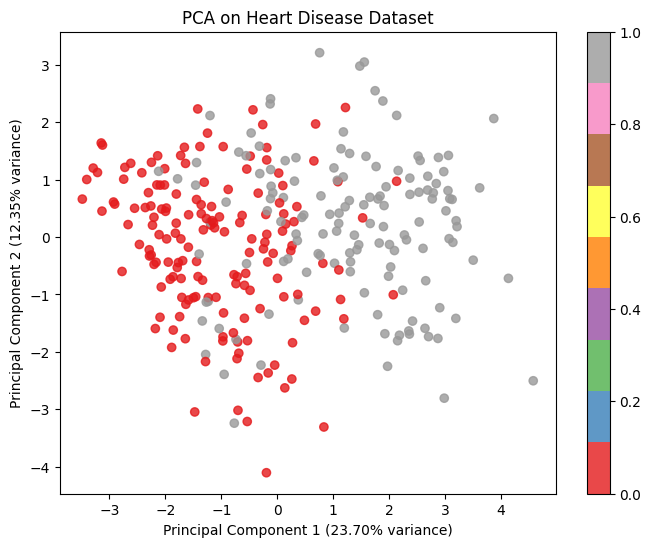

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                'slope', 'ca', 'thal', 'target']
heart_disease_data = pd.read_csv(url, names=column_names)

# Preprocessing: Fill missing values (replace '?' with NaN and drop rows with missing values)
heart_disease_data.replace('?', float('NaN'), inplace=True)
heart_disease_data.dropna(inplace=True)

# Separate features and labels
heart_disease_features = heart_disease_data.drop(columns=['target'])
heart_disease_labels = heart_disease_data['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert target to binary (1 if heart disease, 0 otherwise)

# Scale the features
scaler = StandardScaler()
scaled_heart_disease_features = scaler.fit_transform(heart_disease_features)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_heart_disease_features)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=heart_disease_labels, cmap='Set1', alpha=0.8)
plt.title('PCA on Heart Disease Dataset')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')

plt.colorbar()
plt.show()

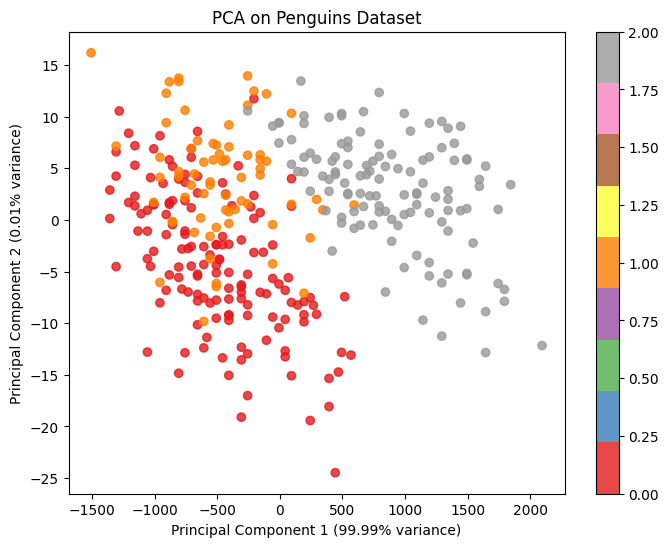

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load Palmer Penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_data = pd.read_csv(url)

# Drop rows with missing values and select relevant features
penguins_data.dropna(inplace=True)
penguins_features = penguins_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
penguins_labels = penguins_data['species'].factorize()[0]  # Factorize species column

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(penguins_features)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=penguins_labels, cmap='Set1', alpha=0.8)
plt.title('PCA on Penguins Dataset')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.colorbar()
plt.show()

## Heatmaps for determining correlations

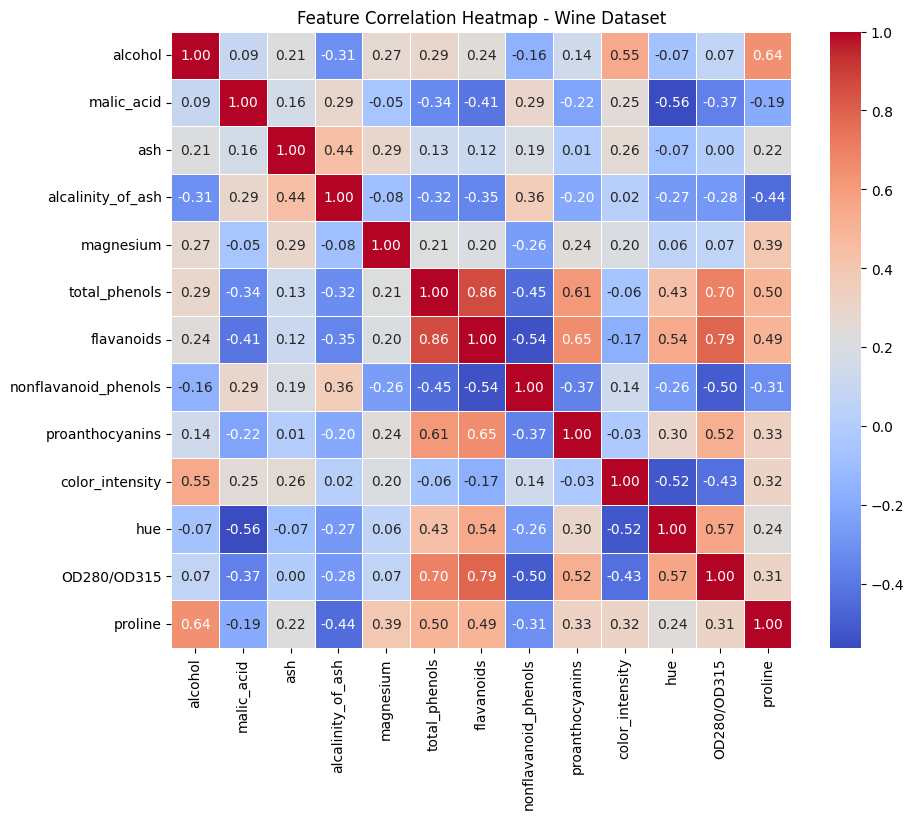

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                'color_intensity', 'hue', 'OD280/OD315', 'proline']
wine_data = pd.read_csv(url, names=column_names)

# Drop the label column ('class') since we only want to visualize feature correlations
wine_features = wine_data.drop(columns=['class'])

# Calculate the correlation matrix
corr_matrix = wine_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap - Wine Dataset')
plt.show()

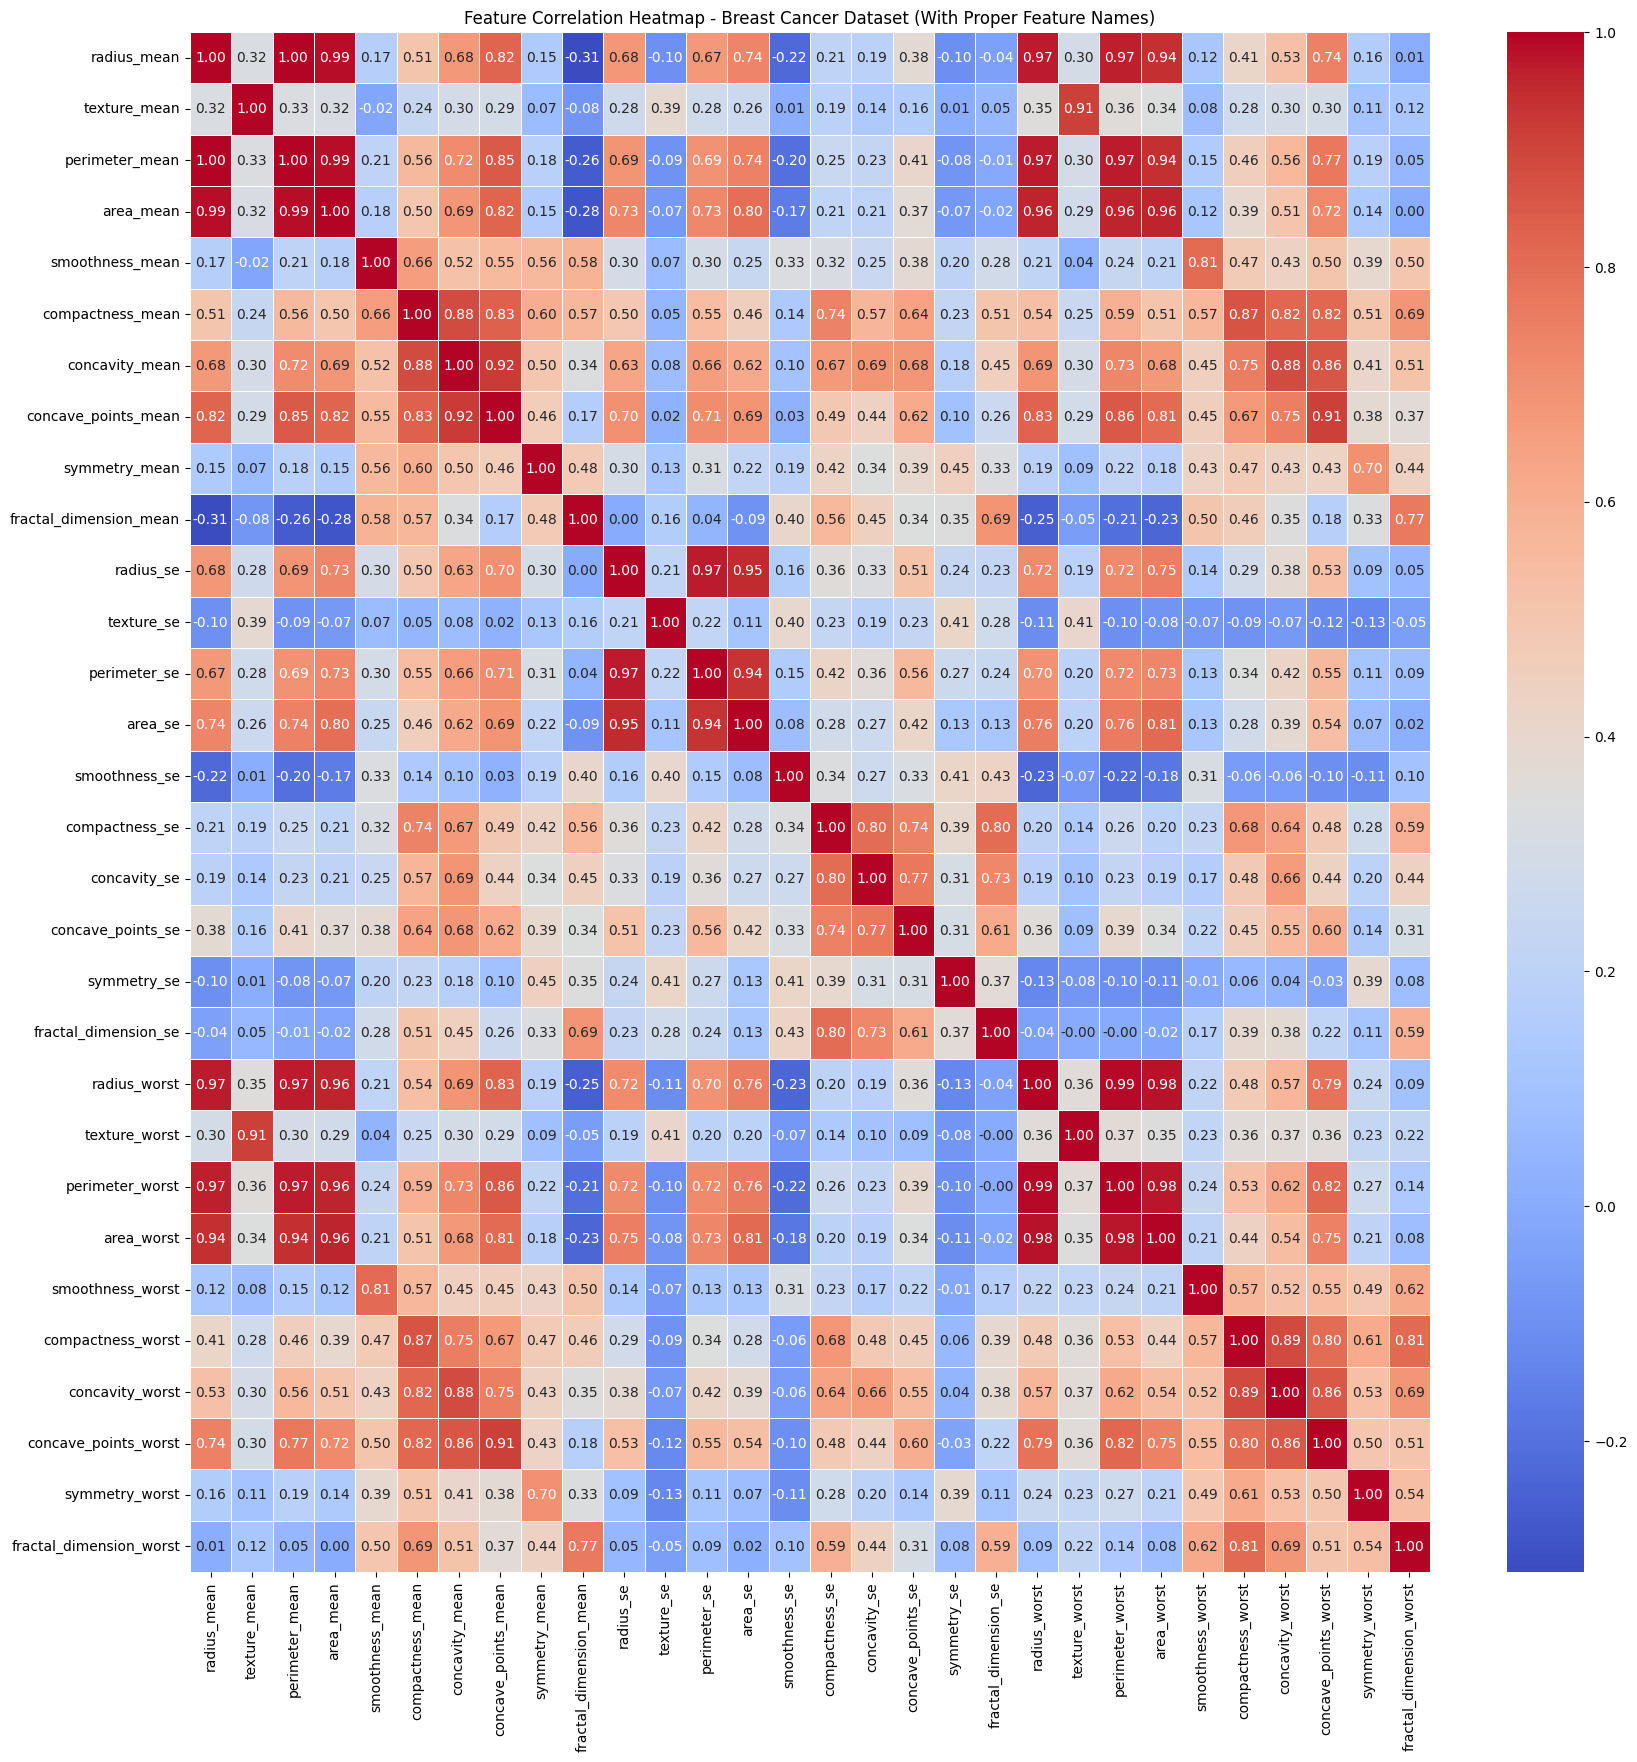

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
                 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
                 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
                 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 
                 'fractal_dimension_worst']
column_names = ['id', 'diagnosis'] + feature_names

# Load dataset with proper column names
breast_cancer_data = pd.read_csv(url, names=column_names)

# Drop 'id' and 'diagnosis' columns since we only want feature correlations
breast_cancer_features = breast_cancer_data.drop(columns=['id', 'diagnosis'])

# Calculate the correlation matrix
corr_matrix = breast_cancer_features.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap - Breast Cancer Dataset (With Proper Feature Names)')
plt.show()

/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_81790/1210178841.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_81790/1210178841.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

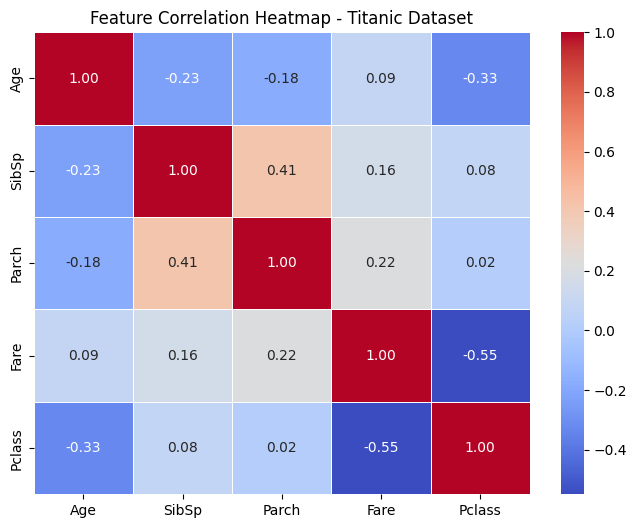

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Preprocessing: Fill missing values and encode categorical features
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Select only numeric features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

# Calculate the correlation matrix
corr_matrix = titanic_data[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap - Titanic Dataset')
plt.show()

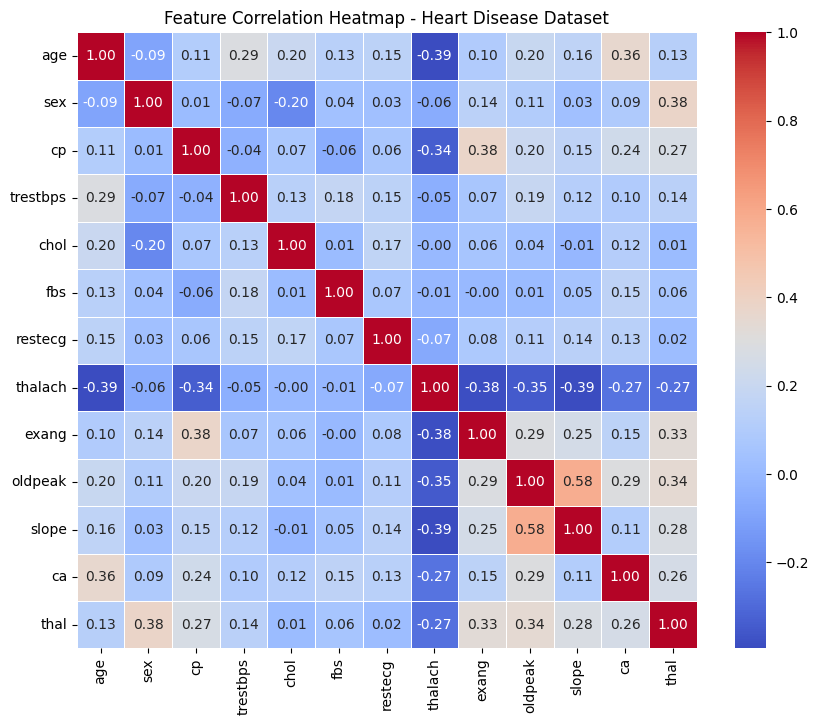

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                'slope', 'ca', 'thal', 'target']
heart_disease_data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN and drop missing values
heart_disease_data.replace('?', float('NaN'), inplace=True)
heart_disease_data.dropna(inplace=True)

# Drop the 'target' column since it's the label
heart_disease_features = heart_disease_data.drop(columns=['target'])

# Calculate the correlation matrix
corr_matrix = heart_disease_features.astype(float).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap - Heart Disease Dataset')
plt.show()

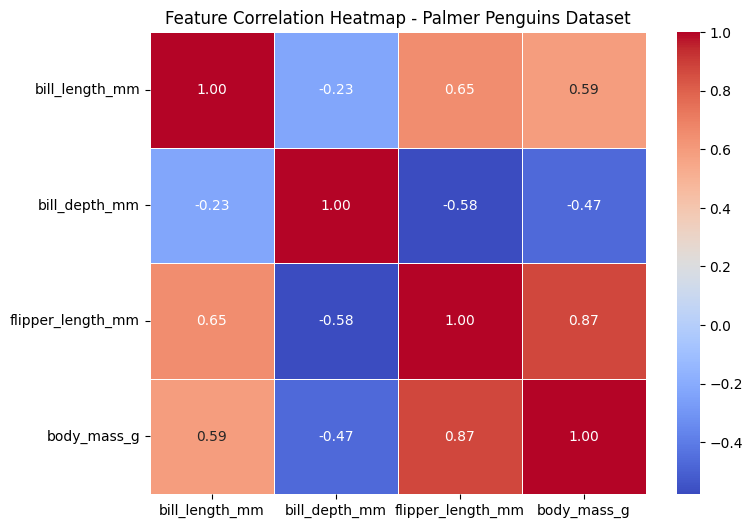

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Palmer Penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_data = pd.read_csv(url)

# Drop rows with missing values
penguins_data.dropna(inplace=True)

# Select numeric features for correlation analysis
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the correlation matrix
corr_matrix = penguins_data[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap - Palmer Penguins Dataset')
plt.show()